In [1]:
import nltk

In [2]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [3]:
from nltk.corpus import stopwords

In [4]:
stopwords.words('english')[0:100:10]

['i',
 "you've",
 'himself',
 'they',
 'that',
 'been',
 'a',
 'while',
 'through',
 'in']

In [5]:
rawdata = open('SMSSpamCollection.tsv').read()

In [6]:
rawdata[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

In [7]:
parseddata = rawdata.replace('\t','\n').split('\n')

In [8]:
parseddata[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [9]:
#split the labels and sentences from parsedata
labellist = parseddata[0::2]
textlist = parseddata[1::2]

In [10]:
print(labellist[0:5])
print(textlist[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']
["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [11]:
print(len(labellist))
print(len(textlist))

5571
5570


In [12]:
#last item of label list is only a space.. 

In [13]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
#last item of label list is ignred
full_corpus = pd.DataFrame({'labe':labellist[:-1],'body':textlist})

In [15]:
full_corpus.head()

,labe,body
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [16]:
#same data frame directly from pandas
df = pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
df.columns = ['labels','texts']

In [17]:
df.head()

,labels,texts
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [18]:
len(df)  # number of rows 

5568

ham     4822
spam     746
Name: labels, dtype: int64


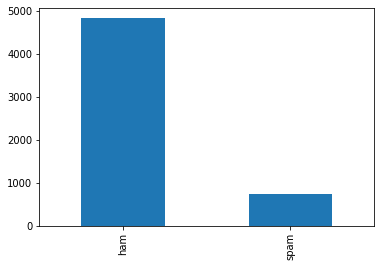

In [19]:
df.labels.value_counts().plot(kind='bar')
print(df.labels.value_counts())
#number of spam and ham values

In [20]:
print(df['labels'].isnull().sum())
print(df['texts'].isnull().sum())

0
0


In [21]:
#there is no null values

### cleaning data

In [22]:
pd.set_option('display.max_colwidth',100)   # for showing most of the values in texts column 
df.head()

,labels,texts
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [23]:
# remove punctuation 
import string
import re
string.punctuation  # we are going to remove this values from data

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
def remove_punc(text):
    text_nopunc = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunc
    

In [25]:
df['text_clean'] = df.texts.apply(lambda x : remove_punc(x)) # remove punc from texts

In [26]:
df.text_clean[0]

'Ive been searching for the right words to thank you for this breather I promise i wont take your help for granted and will fulfil my promise You have been wonderful and a blessing at all times'

In [27]:
# Tokenize

In [28]:
def tokeniz(text):
    tokens = re.split('\W+',text)  ## splite sentence with non words parameters
    return tokens

In [29]:
df['text_tokenized'] = df.text_clean.apply(lambda x:tokeniz(x.lower()))

In [30]:
df.head()

,labels,texts,text_clean,text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [31]:
## remove stopwords

In [32]:
stopwords = nltk.corpus.stopwords.words('english')   # stop words in english language from nltk

In [33]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

In [34]:
df['body_text_nostop'] = df.text_tokenized.apply(lambda x:remove_stopwords(x))    ## stop words removed from data

In [35]:
df.head()

,labels,texts,text_clean,text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [36]:
## stemming

In [37]:
ps = nltk.PorterStemmer()

In [38]:
ps.stem('growed')

'grow'

In [39]:
def stem(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [53]:
df['text_stemmed '] = df.body_text_nostop.apply(lambda x:stem(x))

In [54]:
df.head()

,labels,texts,text_clean,text_tokenized,body_text_nostop,text_stemmed,text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


In [55]:
wn = nltk.WordNetLemmatizer()

In [56]:
wn.lemmatize('wanted')

'wanted'

In [57]:
def lemmatize(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [58]:
df['text_lemmatized'] = df.body_text_nostop.apply(lambda x:lemmatize(x))

In [59]:
df.head()

,labels,texts,text_clean,text_tokenized,body_text_nostop,text_stemmed,text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom...","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promi..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split("\W+",text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
    

In [72]:
df.texts.apply(lambda x:clean_text(x))

0       [ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, won...
1       [free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...
2                                                        [nah, dont, think, goe, usf, live, around, though]
3                                                    [even, brother, like, speak, treat, like, aid, patent]
4                                                                                            [date, sunday]
                                                       ...                                                 
5563    [2nd, time, tri, 2, contact, u, u, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, ...
5564                                                                         [ü, b, go, esplanad, fr, home]
5565                                                                           [piti, mood, soani, suggest]
5566                    [guy

In [73]:
count_vect = CountVectorizer(analyzer=clean_text)

In [75]:
x_count = count_vect.fit_transform(df['texts'])

In [77]:
x_count.shape

(5568, 8107)

In [78]:
print(count_vect.get_feature_names())

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [79]:
print(x_count)

  (0, 3992)	1
  (0, 6232)	1
  (0, 6046)	1
  (0, 7849)	1
  (0, 7045)	1
  (0, 1693)	1
  (0, 5759)	2
  (0, 7840)	1
  (0, 6938)	1
  (0, 3582)	1
  (0, 3402)	1
  (0, 3195)	1
  (0, 7839)	1
  (0, 1580)	1
  (0, 7149)	1
  (1, 3135)	1
  (1, 2791)	2
  (1, 436)	1
  (1, 7819)	1
  (1, 2121)	1
  (1, 7785)	1
  (1, 2910)	2
  (1, 2289)	1
  (1, 3012)	1
  (1, 7171)	1
  :	:
  (5564, 3322)	1
  (5564, 8104)	1
  (5564, 3124)	1
  (5564, 2819)	1
  (5565, 6833)	1
  (5565, 4836)	1
  (5565, 5531)	1
  (5565, 6531)	1
  (5566, 3135)	1
  (5566, 4372)	1
  (5566, 7696)	1
  (5566, 5018)	1
  (5566, 7476)	1
  (5566, 6553)	1
  (5566, 1777)	1
  (5566, 2749)	1
  (5566, 3241)	1
  (5566, 3465)	1
  (5566, 3804)	1
  (5566, 3919)	1
  (5566, 997)	1
  (5566, 1564)	1
  (5567, 4940)	1
  (5567, 7309)	1
  (5567, 6073)	1


In [83]:
dataset = pd.DataFrame(x_count.toarray())

In [88]:
dataset   # use for machine learning model 
y = df.labels.apply(lambda x : 1 if x == 'ham' else (0 if x == 'spam' else x) )

In [91]:
X= dataset

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [100]:
lr = LogisticRegression()

In [101]:
model1 = lr.fit(X_train,y_train)

In [102]:
accuracy_score(model1.predict(X_test),y_test)

0.9847396768402155